# <center> Seaborn

In [4]:
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')

Text(0.5, 1.0, 'Correlation between Global Sales and Critic Scores')

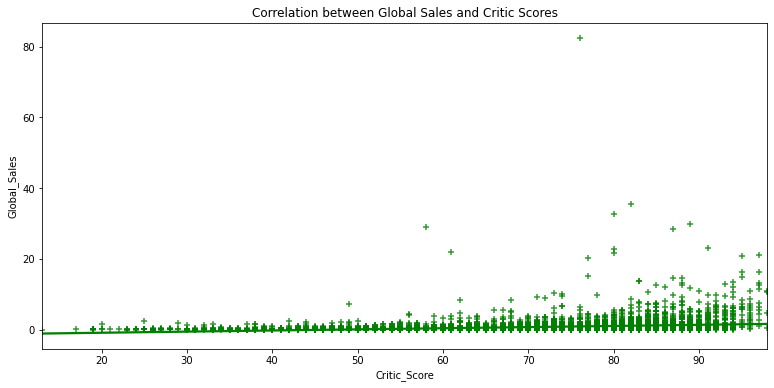

In [18]:
# посмотрим зависимость продаж и оценок критиков
ax = sns.regplot(data=df, x='Critic_Score', y='Global_Sales', color='green', marker='+')
ax.set_title('Correlation between Global Sales and Critic Scores')

C помощью seaborn можно построить достаточно сложные визуализации, которые были бы очень сложны для представления в коде при использовании matplotlib. Рассмотрим часть из них.

Посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По-умолчанию на визуализации отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

Text(0.5, 1.0, 'Critic Score distribution')

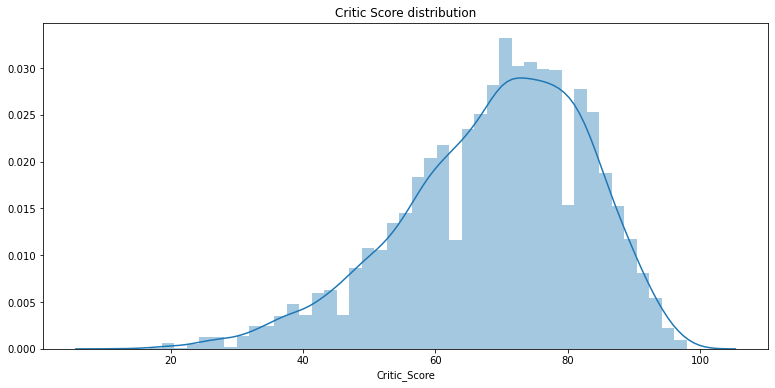

In [19]:
ax = sns.distplot(df.Critic_Score)
ax.set_title('Critic Score distribution')

**pair plot (scatter plot matrix)** поможет нам посмотреть на одной картинке, как связаны между собой различные признаки в наборе данных

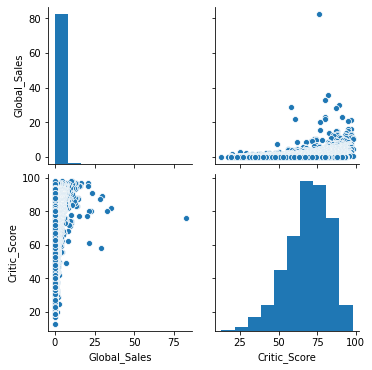

In [22]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'User_Score']])

Давайте сравним оценки критиков игр для топ-5 крупнейших игровых платформ при помощи boxplot.

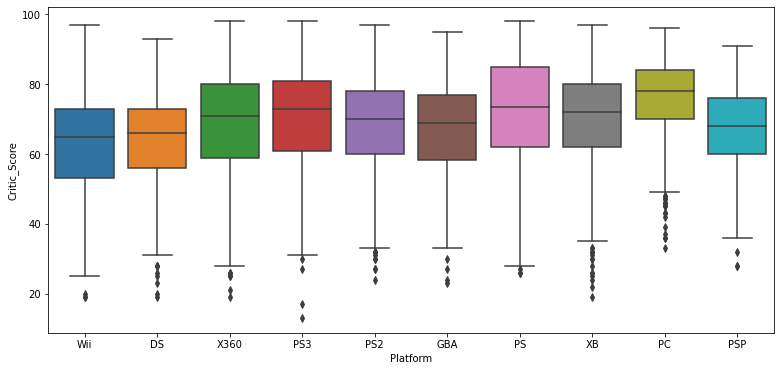

In [23]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(10).index.values
# top_platforms
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)])

Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

In [24]:
platform_genre_sales = df[df['Platform'].isin(top_platforms)].pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0)

platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
DS,112.70,45.90,7.11,135.72,75.92,82.72,38.10,124.44,7.92,130.29,31.41,14.87
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45
PC,31.71,10.04,0.29,8.57,0.49,0.92,3.99,47.72,45.92,52.61,12.01,46.03
PS,127.05,20.97,72.68,44.90,64.21,12.08,103.19,78.30,39.31,25.33,120.97,21.69
PS2,272.76,21.16,92.60,101.14,72.51,5.90,156.28,93.50,108.57,42.66,273.41,15.15
PS3,301.55,22.28,51.08,46.88,29.71,0.58,72.13,73.67,192.46,10.39,133.88,4.82
PSP,64.11,10.68,21.82,13.91,17.09,5.52,34.29,48.98,19.66,6.23,41.51,10.50
Wii,114.51,17.83,23.36,216.37,88.92,15.37,60.25,13.70,28.15,36.03,288.61,5.03
X360,239.69,14.94,37.34,91.54,11.32,0.85,65.00,71.31,276.98,14.18,138.45,10.03


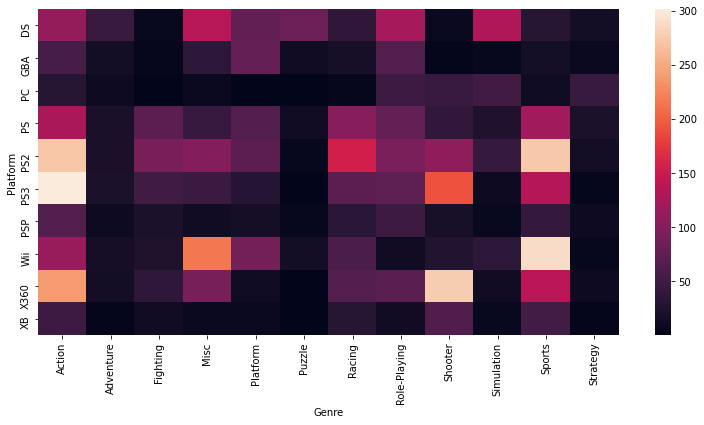

In [25]:
sns.heatmap(platform_genre_sales)